     preg  plas  pres  skin  insu  mass   pedi  age  tested_negative
0       6   148    72    35     0  33.6  0.627   50                0
1       1    85    66    29     0  26.6  0.351   31                1
2       8   183    64     0     0  23.3  0.672   32                0
3       1    89    66    23    94  28.1  0.167   21                1
4       0   137    40    35   168  43.1  2.288   33                0
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63                1
764     2   122    70    27     0  36.8  0.340   27                1
765     5   121    72    23   112  26.2  0.245   30                1
766     1   126    60     0     0  30.1  0.349   47                0
767     1    93    70    31     0  30.4  0.315   23                1

[768 rows x 9 columns]
670.3604499729242


Text(0.5, 0, 'Experimental LogS')

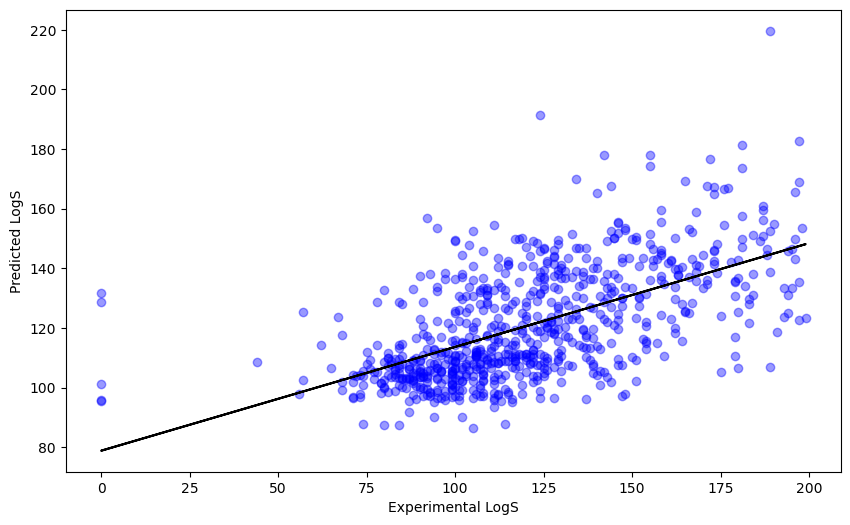

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor



df = pd.read_csv('diabetes2.csv')
print(df)
X = df.drop(['plas'], axis=1)
y = df.iloc[:,1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print(lr_train_mse)

lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

rf = RandomForestRegressor(max_depth=1, random_state=2)
rf.fit(X_train, y_train)
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

et = ExtraTreeRegressor(random_state=2)
et.fit(X_train, y_train)

pd.concat([lr_results, rf_results])
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=y_lr_train_pred, c="blue", alpha=0.4)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"black")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

